# Generate Simulated Data: Fixed-Plaintext-Dataset-2

In [26]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [27]:
# Define lengh for the data set
data_leng = 400000
numberOfSamples = 50

# Define key for encryption
key = 23

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = True

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

In [28]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [29]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,400000,50,23,0.0,5.0,-5,5


In [30]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [31]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))

print("plaintext:",plaintext[0:5])

plaintext: [74, 74, 74, 74, 74]


In [32]:
# Verify size of plaintext
len(plaintext)

400000

In [33]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [2.575663502969303, -4.356651529900361, 4.722189867513203, 11.168980784447266, 6.579978402054141] 
labels: [3, 3, 3, 3, 3]


In [34]:
# Verify size of leakedData 
len(leakedData)

400000

In [35]:
# Verify size of labels 
len(labels)

400000

In [36]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace at index 24 equal to t=25, index i matches with the leaked data
        if z == 24:
            rawData.append(leakedData[i])
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  deque([12.959814927990058, 6.937592356058357, -6.529006705479329, 1.0631147388073243, -4.818716445734012, 6.75967107582495, 15.60956475341372, -1.0732062739763881, -1.1023959126311276, 4.539636807413298, 7.482535966459699, 4.962184298053964, -4.0656905755815025, 4.222908462136429, -4.084385495384083, 8.281813597618685, -2.8275547727861907, 1.4692131796918644, -1.0814181395062512, 2.575663502969303, 6.705752824999595, -2.5189990811228515, 0.6050829751456694, 5.002808677416447, 6.696740064113193, 8.360262640192811, 16.338741708595542, -0.015588200734498514, -2.0197797847367616, 4.775337703625138, 7.4581920950945975, 8.225498499053044, 4.678252677546967, -2.5716984311122095, 8.786351403040545, 3.808835973000819, -2.1686302759746257, 4.908671296273369, 3.2686224997716193, 13.474390559780625, 2.5405163173217655, 8.479709237409391, -5.073414947085423, 7.035444084427448, 13.339149999001043, 13.752576683204037, -1.7619768077407638, 3.1572319585507786, 9.051610131573318

In [37]:
# Verify size of leakedData 
len(rawTraces)

400000

## Plot Simulated Data

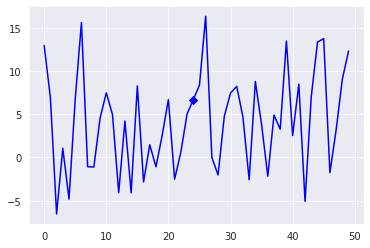

In [38]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[24])

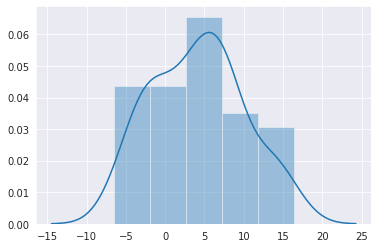

In [39]:
sns.distplot(rawTraces[0])

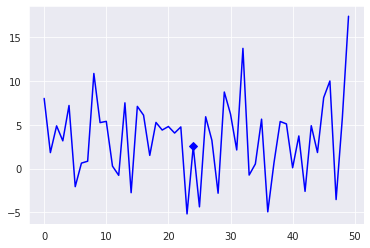

In [40]:
plt.plot(rawTraces[1],'-bD',markevery=[24])

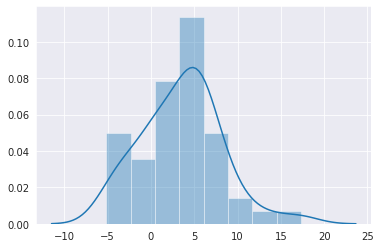

In [41]:
sns.distplot(rawTraces[1])

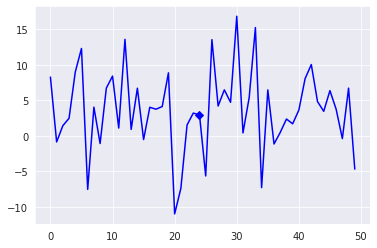

In [42]:
plt.plot(rawTraces[2],'-bD',markevery=[24])

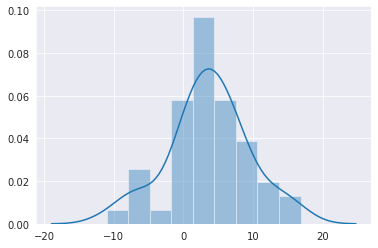

In [43]:
sns.distplot(rawTraces[2])

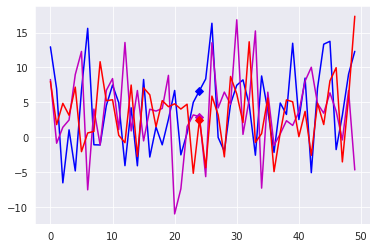

In [44]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[24])

### Data Path

In [45]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Test

In [46]:
class TestNotebook(unittest.TestCase):

    def test_Plaintext(self):
        self.assertEqual(plaintext[0], plaintext[1])
    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Plaintext (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.006s

OK


In [47]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
fixedKey = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,12.959815,6.937592,-6.529007,1.063115,-4.818716,6.759671,15.609565,-1.073206,-1.102396,4.539637,...,8.479709,-5.073415,7.035444,13.339150,13.752577,-1.761977,3.157232,9.051610,12.314646,74
1,7.986416,1.817974,4.861836,3.157781,7.183819,-2.059634,0.621275,0.836455,10.828063,5.232810,...,3.715486,-2.595285,4.878345,1.827085,8.081912,9.971197,-3.527975,5.728682,17.344460,74
2,8.275639,-0.852854,1.432122,2.477617,8.977889,12.299752,-7.531775,4.041065,-1.078662,6.717385,...,8.050947,10.035221,4.827425,3.454938,6.369002,3.748451,-0.384736,6.713299,-4.677558,74
3,-3.853707,12.560173,4.709670,7.092904,2.293139,-2.768508,0.170263,-6.652158,2.825978,-3.899284,...,9.750033,9.825871,1.075289,5.148314,-4.477804,-3.537213,4.997460,-0.440968,7.846025,74
4,3.887986,2.899127,8.700215,-1.551068,5.706724,6.729398,2.217545,7.255493,-1.612403,13.645994,...,-3.097043,9.462401,-0.076652,2.577661,4.883186,-10.039430,1.833968,6.720946,5.051788,74


### Write Data

In [48]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS2_B.csv',index=False)